In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
from prophet.serialize import model_to_json, model_from_json
import os

In [3]:
files = [f for f in os.listdir('data/') if f.endswith('.csv')]

In [4]:
data = {
  str(city).split('.')[0]: pd.read_csv('./data/' + city)
    for n,city in enumerate(files)
}

In [16]:
data.keys()

dict_keys(['Austin', 'Miami', 'San_Francisco_2', 'San_Francisco', 'WashingtonDC', 'New_York'])

In [17]:
# lowercase col names

for d in data.keys():
    data[d].columns = data[d].columns.str.lower()

In [18]:
data['Austin'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  1778 non-null   object 
 1   name     1778 non-null   object 
 2   date     1778 non-null   object 
 3   tmax     1772 non-null   float64
 4   tmin     1770 non-null   float64
dtypes: float64(2), object(3)
memory usage: 69.6+ KB


In [19]:
df_austin = data['Austin']
df_miami = data['Miami']
df_newyork = data['New_York']
df_sanfran = data['San_Francisco_2']
df_washington = data['WashingtonDC']

In [20]:
df_austin['tavg'] = (df_austin.tmax + df_austin.tmin) / 2
df_miami['tavg'] = (df_miami.tmax + df_miami.tmin) / 2
df_newyork['tavg'] = (df_newyork.tmax + df_newyork.tmin) / 2
df_sanfran['tavg'] = (df_sanfran.tmax + df_sanfran.tmin) / 2
df_washington['tavg'] = (df_washington.tmax + df_washington.tmin) / 2

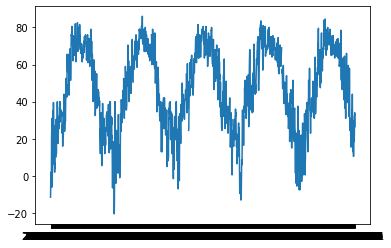

In [21]:
plt.plot(data['Austin'].date, data['Austin'].tavg)
plt.show()

In [22]:
data['Austin'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  1778 non-null   object 
 1   name     1778 non-null   object 
 2   date     1778 non-null   object 
 3   tmax     1772 non-null   float64
 4   tmin     1770 non-null   float64
 5   tavg     1768 non-null   float64
dtypes: float64(3), object(3)
memory usage: 83.5+ KB


In [23]:
m_austin = Prophet()
# m_sanfan = Prophet()
# m_miami = Prophet()
# m_newyork = Prophet()
# m_washington = Prophet()

In [24]:
austin_train_data = df_austin.rename(columns={'date':'ds','tavg':'y'})
# sanfran_train_data = df_sanfran.rename(columns={'date':'ds','tavg':'y'})
# miami_train_data = df_miami.rename(columns={'date':'ds','tavg':'y'})
# newyork_train_data = df_newyork.rename(columns={'date':'ds','tavg':'y'})
# washington_train_data = df_washington.rename(columns={'date':'ds','tavg':'y'})

In [25]:
fit_data = {
    'Austin': m_austin.fit(austin_train_data),
#     'San_Francisco': m_sanfan.fit(sanfran_train_data),
#     'Miami': m_miami.fit(miami_train_data),
#     'New_York': m_newyork.fit(newyork_train_data),
#     'WashingtonDC': m_washington.fit(washington_train_data)
}

11:34:10 - cmdstanpy - INFO - Chain [1] start processing
11:34:10 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
fit_data

{'Austin': <prophet.forecaster.Prophet at 0x7faf796336d0>}

In [28]:
with open('../models/austin.json', 'w') as fout:
    json.dump(model_to_json(fit_data['Austin']), fout)

In [103]:
with open('../models/miami.json', 'w') as fout:
    json.dump(model_to_json(fit_data['Miami']), fout)

In [104]:
with open('../models/newyork.json', 'w') as fout:
    json.dump(model_to_json(fit_data['New_York']), fout)

In [105]:
with open('../models/washington.json', 'w') as fout:
    json.dump(model_to_json(fit_data['WashingtonDC']), fout)

In [15]:
with open('../models/sanfran2.json', 'w') as fout:
    json.dump(model_to_json(fit_data['San_Francisco']), fout)